# Lab 1: Introduction to ML - Exercises

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as ss

import math
import seaborn as sns

# plotting
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import spearmanr

from sklearn.feature_selection import mutual_info_classif # used for classification task

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit
givenDec3 = lambda gdVal: float('%.3f' % gdVal) # 3 digit

### Correlation between variables

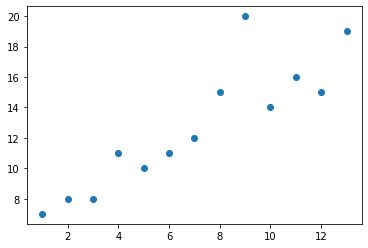

In [2]:
#Create two random variable 
X = [1,2,3,4,5,6,7,8,9,10,11,12,13]
Y = [7,8,8,11,10,11,12,15,20,14,16,15,19]

#plot the variables to show linearity
plt.scatter(X,Y)
# plt.scatter(X,list(reversed(Y)))
plt.show()

In [3]:
# create a dataframe from X and Y vectors
df_xy = pd.DataFrame({
    'X': X,
    'Y': Y
})
df_xy

,X,Y
0,1,7
1,2,8
2,3,8
3,4,11
4,5,10
5,6,11
6,7,12
7,8,15
8,9,20
9,10,14


In [4]:
# use pandas functions to calculate pearson correlation
df_xy.corr('pearson')

,X,Y
X,1.000000,0.887636
Y,0.887636,1.000000


In [5]:
# use pandas functions to calculate spearman correlation
df_xy.corr('spearman')

,X,Y
X,1.000000,0.907594
Y,0.907594,1.000000


### Experimenting with actual data set

In [6]:
# read data
df_lp = pd.read_csv('LoanPrediction_train.csv')
# print out first 5 rows of data
df_lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# summarize information from data
df_lp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# convert categorical variables to numericals
df_lp['Married'] =df_lp['Married'].astype('category').cat.codes
df_lp['Gender'] =df_lp['Gender'].astype('category').cat.codes
df_lp['Loan_ID'] =df_lp['Loan_ID'].astype('category').cat.codes
df_lp['Dependents'] =df_lp['Dependents'].astype('category').cat.codes
df_lp['Education'] =df_lp['Education'].astype('category').cat.codes
df_lp['Self_Employed'] =df_lp['Self_Employed'].astype('category').cat.codes
df_lp['Property_Area'] =df_lp['Property_Area'].astype('category').cat.codes
df_lp['Loan_Status'] =df_lp['Loan_Status'].astype('category').cat.codes

#handle missing values in the data set
df_lp['Gender'].fillna(df_lp['Gender'].mode()[0], inplace=True)
df_lp['Married'].fillna(df_lp['Married'].mode()[0], inplace=True)
df_lp['Dependents'].fillna(df_lp['Dependents'].mode()[0], inplace=True)
df_lp['LoanAmount'].fillna(df_lp['LoanAmount'].mode()[0], inplace=True)
df_lp['Loan_Amount_Term'].fillna(df_lp['Loan_Amount_Term'].mode()[0], inplace=True)
df_lp['Credit_History'].fillna(df_lp['Credit_History'].mode()[0], inplace=True)

df_lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [9]:
df_lp.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.775244,0.643322,0.719870,0.218241,0.081433,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.465767,0.489511,1.039056,0.413389,0.423472,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


#### operations over columns of the dataset

In [10]:
np.mean(df_lp["ApplicantIncome"])

5403.459283387622

In [10]:
# correlation plot over select subsets of the columns
numeric_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
target_column = ["Loan_Status"] # may be considered as an ordinal variable
subset_columns = numeric_columns + target_column 

# print out the correlation matrix
df_lp[subset_columns].corr("spearman")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.320056,0.501755,-0.040292,0.037180,-0.004162
CoapplicantIncome,-0.320056,1.000000,0.238332,-0.012435,0.001271,0.034960
LoanAmount,0.501755,0.238332,1.000000,0.038515,0.001984,-0.029271
Loan_Amount_Term,-0.040292,-0.012435,0.038515,1.000000,0.007093,-0.027664
Credit_History,0.037180,0.001271,0.001984,0.007093,1.000000,0.540556
Loan_Status,-0.004162,0.034960,-0.029271,-0.027664,0.540556,1.000000


In [11]:
# color coded correlation matrix
df_lp[subset_columns].corr("spearman").style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.320056,0.501755,-0.040292,0.037180,-0.004162
CoapplicantIncome,-0.320056,1.000000,0.238332,-0.012435,0.001271,0.034960
LoanAmount,0.501755,0.238332,1.000000,0.038515,0.001984,-0.029271
Loan_Amount_Term,-0.040292,-0.012435,0.038515,1.000000,0.007093,-0.027664
Credit_History,0.037180,0.001271,0.001984,0.007093,1.000000,0.540556
Loan_Status,-0.004162,0.034960,-0.029271,-0.027664,0.540556,1.000000


In [12]:
# for a categorical variable, frequency of outcomes
df_lp["Property_Area"].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [13]:
# for a categorical variable, relative frequency
df_lp.groupby("Property_Area")['Loan_Status'].value_counts()

Property_Area  Loan_Status
0              1              110
               0               69
1              1              179
               0               54
2              1              133
               0               69
Name: Loan_Status, dtype: int64

### Probability calculations

In [14]:
# marginal probability distribution
marginal_credHistory_probs = df_lp.groupby("Credit_History").size().div(len(df_lp))

In [15]:
# conditional probability distribution
df_condProb_cs = df_lp.groupby('Credit_History')['Loan_Status'].value_counts() / df_lp.groupby('Credit_History')['Loan_Status'].count()
df_condProb_cs

Credit_History  Loan_Status
0.0             0              0.921348
                1              0.078652
1.0             1              0.790476
                0              0.209524
Name: Loan_Status, dtype: float64

In [16]:
joint_prob = {}
for c in range(2):
    for s in range(2):
        joint_prob[c,s] = np.round(df_condProb_cs[c,s]*marginal_credHistory_probs[c],3)
joint_prob

{(0, 0): 0.134, (0, 1): 0.011, (1, 0): 0.179, (1, 1): 0.676}

In [17]:
# sklearn function to calculate the mutual information between the features in the data set and target variable
mutual_info_classif(df_lp.drop("Loan_Status", axis=1),df_lp["Loan_Status"]) # random_state = 1

array([0.        , 0.01234327, 0.01681962, 0.00427578, 0.        ,
       0.02607614, 0.00720455, 0.01075032, 0.        , 0.        ,
       0.12603279, 0.01161332])

### Clustering of the data points

In [29]:
from sklearn.datasets import make_blobs

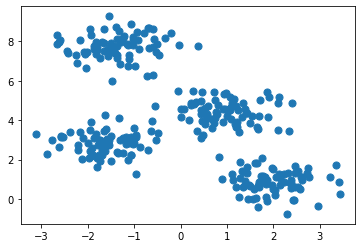

In [16]:
from sklearn.datasets import make_blobs

# generate data points with cluster ids y_ctrue
X_blobs, y_ctrue = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# plot the data points
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50);

plt.show()

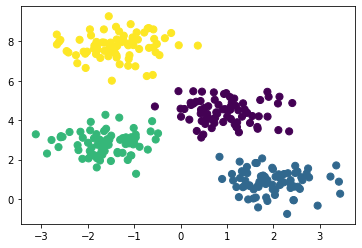

In [17]:
# color code the clusters
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_ctrue, s=50);

plt.show()

# Exercises

$\color{red}{\textbf{RULES:}}$

Please do the following exercises. These will not be graded, however, you are expected to work on them during the lab hour. 

The students may leave early after consulting with Graduate Assistant in case the entire set of exercises are completed.

### Pearson Correlation

Implement a function based on the description of the Pearson correlation provided in Lab1_notes.pdf that returns the pearson correlation between two given variables in the data set df_lp. Provide a table that compares the results with the pandas pearson correlation function. 

In [59]:
import math # for sqrt function

def GetCorrelation_pearson(gvx, gvy):
    # enter your code here
    
    
    df_xy.corr('df_lp')
    
df_lp

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [61]:
GetCorrelation_pearson(df_lp["Credit_History"],df_lp["Loan_Status"])





ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, 'df_lp' was supplied

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 5.27)
sns.heatmap(df_lp.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation="horizontal")
#plt.savefig('outfiles/lp_pearson_correlation.png', bbox_inches='tight', pad_inches=0.0)

### Spearman Correlation

Implement a function based on the description of the Spearman correlation provided in Lab1_notes.pdf that returns the spearman correlation between two given variables in the data set df_lp. Provide a table that compares the results with the pandas spearman correlation function. 

In [ ]:
# you can use scipy.stats function rankdata() to rank the values in a given vector
def GetCorrelation_spearman(gvx, gvy):
    # enter your code here
    

In [ ]:
GetCorrelation_spearman(X,Y)

In [ ]:
GetCorrelation_spearman(df_lp["Credit_History"],df_lp["Loan_Status"])

In [ ]:
df_lp.corr("spearman").style.background_gradient(cmap='coolwarm')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 5.27)
sns.heatmap(df_lp.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation="horizontal")
#plt.savefig('outfiles/lp_spearman_correlation.png', bbox_inches='tight', pad_inches=0.0)

### Mutual Info calculations

Implement a function based on the description of the Mutual Information provided in Lab1_notes.pdf that returns the mutual information between two given variables in the data set df_lp. Provide a table that compares the results with the sklearn mutual information function.

In [ ]:
def GetMutualInfo(gdf, sCol1, sCol2):
    # enter your code here
    return
# example usage
GetMutualInfo(df_lp, "Credit_History", "Loan_Status")

In [ ]:
for feat in df_lp.columns:
    if feat != "Loan_Status":
        print(GetMutualInfo(df_lp, feat, "Loan_Status"))

### Clustering over pandas dataframe

Provide scatter plots of various pairs of columns in df_lp dataframe by using different categorical features as the cluster id's. Do these scatter plots show any meaningful patterns? 